<a href="https://colab.research.google.com/github/OFrancisco3/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
ingreso_total = tienda["Precio"].sum() + tienda2["Precio"].sum() + tienda3["Precio"].sum() + tienda4["Precio"].sum()
print(ingreso_total)

4403619200.0


In [ ]:
ingreso_total_tienda_1 = tienda["Precio"].sum()
ingreso_total_tienda_2 = tienda2["Precio"].sum()
ingreso_total_tienda_3 = tienda3["Precio"].sum()
ingreso_total_tienda_4 = tienda4["Precio"].sum()
print(f" La tienda 1 tiene un ingreso total de: {ingreso_total_tienda_1}")
print(f" La tienda 2 tiene un ingreso total de: {ingreso_total_tienda_2}")
print(f" La tienda 3 tiene un ingreso total de: {ingreso_total_tienda_3}")
print(f" La tienda 4 tiene un ingreso total de: {ingreso_total_tienda_4}")

 La tienda 1 tiene un ingreso total de: 1150880400.0
 La tienda 2 tiene un ingreso total de: 1116343500.0
 La tienda 3 tiene un ingreso total de: 1098019600.0
 La tienda 4 tiene un ingreso total de: 1038375700.0


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
categorias_tienda_1 = tienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_1

,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [ ]:
categorias_tienda_2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_2

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [ ]:
categorias_tienda_3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_3

,0
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [ ]:
categorias_tienda_4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_4

,0
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [ ]:

# Función para calcular las categorías más populares de una tienda
def categoria_mas_popular(df, nombre_tienda):
    # Agrupar por categoría y contar las ventas
    ventas_por_categoria = (
        df.groupby('Categoría del Producto')
          .size()
          .reset_index(name='Cantidad_Ventas')
    )

    # Encontrar la categoría más popular
    categoria_popular = (
        ventas_por_categoria.loc[ventas_por_categoria['Cantidad_Ventas'].idxmax()]
    )

    # Agregar el nombre de la tienda al resultado
    categoria_popular['Tienda'] = nombre_tienda

    return categoria_popular[['Tienda', 'Categoría del Producto', 'Cantidad_Ventas']]

# Cargar los datos de cada tienda
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Calcular la categoría más popular para cada tienda
resultado_tienda_1 = categoria_mas_popular(tienda, 'Tienda 1')
resultado_tienda_2 = categoria_mas_popular(tienda2, 'Tienda 2')
resultado_tienda_3 = categoria_mas_popular(tienda3, 'Tienda 3')
resultado_tienda_4 = categoria_mas_popular(tienda4, 'Tienda 4')

# Combinar los resultados en un solo DataFrame
resultados_finales = pd.concat(
    [resultado_tienda_1, resultado_tienda_2, resultado_tienda_3, resultado_tienda_4],
    ignore_index=True
)

# Mostrar los resultados finales
print(resultados_finales)

0     Tienda 1
1      Muebles
2          465
3     Tienda 2
4      Muebles
5          442
6     Tienda 3
7      Muebles
8          499
9     Tienda 4
10     Muebles
11         480
Name: 7, dtype: object


<ipython-input-8-c74510a5cd5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_popular['Tienda'] = nombre_tienda
<ipython-input-8-c74510a5cd5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_popular['Tienda'] = nombre_tienda
<ipython-input-8-c74510a5cd5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_popular['Tienda'] = nombre_tienda
<ipython-input-8-c74510a5cd5d>:16: SettingWithCopyWarning: 
A va

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
calificacion_promedio_tienda_1=tienda["Calificación"].mean()
calificacion_promedio_tienda_2=tienda2["Calificación"].mean()
calificacion_promedio_tienda_3=tienda3["Calificación"].mean()
calificacion_promedio_tienda_4=tienda4["Calificación"].mean()

In [ ]:
print(f"La calificación promedio de la tienda 1 es: {calificacion_promedio_tienda_1.round(3)}")
print(f"La calificación promedio de la tienda 2 es: {calificacion_promedio_tienda_2.round(3)}")
print(f"La calificación promedio de la tienda 3 es: {calificacion_promedio_tienda_3.round(3)}")
print(f"La calificación promedio de la tienda 4 es: {calificacion_promedio_tienda_4.round(3)}")

La calificación promedio de la tienda 1 es: 3.977
La calificación promedio de la tienda 2 es: 4.037
La calificación promedio de la tienda 3 es: 4.048
La calificación promedio de la tienda 4 es: 3.996


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
productos_mas_vendidos_tienda_1 = tienda.groupby("Producto").size().sort_values(ascending=False)
productos_mas_vendidos_tienda_2 = tienda2.groupby("Producto").size().sort_values(ascending=False)
productos_mas_vendidos_tienda_3 = tienda3.groupby("Producto").size().sort_values(ascending=False)
productos_mas_vendidos_tienda_4 = tienda4.groupby("Producto").size().sort_values(ascending=False)
print(f"La tienda 1.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_1.index[0]}: {int(productos_mas_vendidos_tienda_1.head(1).loc['Armario'])} y el producto menos vendido: {productos_mas_vendidos_tienda_1.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Auriculares con micrófono'])} ")
print(f"La tienda 2.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_2.index[0]}: {int(productos_mas_vendidos_tienda_2.head(1).loc['Iniciando en programación'])} y el producto menos vendido: {productos_mas_vendidos_tienda_2.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Juego de mesa'])}")
print(f"La tienda 3.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_3.index[0]}: {int(productos_mas_vendidos_tienda_3.head(1).loc['Kit de bancas'])} y el producto menos vendido: {productos_mas_vendidos_tienda_3.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Bloques de construcción'])}")
print(f"La tienda 4.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_4.index[0]}: {int(productos_mas_vendidos_tienda_4.head(1).loc['Cama box'])} y el producto menos vendido: {productos_mas_vendidos_tienda_4.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Guitarra eléctrica'])}")

La tienda 1.- Tiene como producto más vendido: Armario: 60 y el producto menos vendido: Auriculares con micrófono: 33 
La tienda 2.- Tiene como producto más vendido: Iniciando en programación: 65 y el producto menos vendido: Juego de mesa: 43
La tienda 3.- Tiene como producto más vendido: Kit de bancas: 57 y el producto menos vendido: Bloques de construcción: 56
La tienda 4.- Tiene como producto más vendido: Cama box: 62 y el producto menos vendido: Guitarra eléctrica: 47


In [ ]:
# Contar las ventas por producto en cada tienda
ventas_tienda_1 = tienda.groupby('Producto').size().reset_index(name='Ventas')
ventas_tienda_2 = tienda2.groupby('Producto').size().reset_index(name='Ventas')
ventas_tienda_3 = tienda3.groupby('Producto').size().reset_index(name='Ventas')
ventas_tienda_4 = tienda4.groupby('Producto').size().reset_index(name='Ventas')

In [ ]:
def obtener_mas_y_menos_vendidos(ventas):
    mas_vendido = ventas.loc[ventas['Ventas'].idxmax()]
    menos_vendido = ventas.loc[ventas['Ventas'].idxmin()]
    return mas_vendido, menos_vendido

# Aplicar la función a cada tienda
mas_vendido_1, menos_vendido_1 = obtener_mas_y_menos_vendidos(ventas_tienda_1)
mas_vendido_2, menos_vendido_2 = obtener_mas_y_menos_vendidos(ventas_tienda_2)
mas_vendido_3, menos_vendido_3 = obtener_mas_y_menos_vendidos(ventas_tienda_3)
mas_vendido_4, menos_vendido_4 = obtener_mas_y_menos_vendidos(ventas_tienda_4)

In [ ]:
# Resultados para Tienda 1
print("Tienda 1:")
print(f"Producto más vendido: {mas_vendido_1['Producto']} ({mas_vendido_1['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_1['Producto']} ({menos_vendido_1['Ventas']} ventas)\n")

# Resultados para Tienda 2
print("Tienda 2:")
print(f"Producto más vendido: {mas_vendido_2['Producto']} ({mas_vendido_2['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_2['Producto']} ({menos_vendido_2['Ventas']} ventas)\n")

# Resultados para Tienda 3
print("Tienda 3:")
print(f"Producto más vendido: {mas_vendido_3['Producto']} ({mas_vendido_3['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_3['Producto']} ({menos_vendido_3['Ventas']} ventas)\n")

# Resultados para Tienda 4
print("Tienda 4:")
print(f"Producto más vendido: {mas_vendido_4['Producto']} ({mas_vendido_4['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_4['Producto']} ({menos_vendido_4['Ventas']} ventas)\n")

Tienda 1:
Producto más vendido: Armario (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
costo_promedio_envio_tienda_1 = tienda["Costo de envío"].mean()
costo_promedio_envio_tienda_2 = tienda2["Costo de envío"].mean()
costo_promedio_envio_tienda_3 = tienda3["Costo de envío"].mean()
costo_promedio_envio_tienda_4 = tienda4["Costo de envío"].mean()

In [ ]:
print(f"El costo promedio de envío de la tienda 1 es: {costo_promedio_envio_tienda_1.round(3)}")
print(f"El costo promedio de envío de la tienda 2 es: {costo_promedio_envio_tienda_2.round(3)}")
print(f"El costo promedio de envío de la tienda 3 es: {costo_promedio_envio_tienda_3.round(3)}")
print(f"El costo promedio de envío de la tienda 4 es: {costo_promedio_envio_tienda_4.round(3)}")


El costo promedio de envío de la tienda 1 es: 26018.61
El costo promedio de envío de la tienda 2 es: 25216.236
El costo promedio de envío de la tienda 3 es: 24805.68
El costo promedio de envío de la tienda 4 es: 23459.457


# Generando gráfico

1. Análisis de facturación

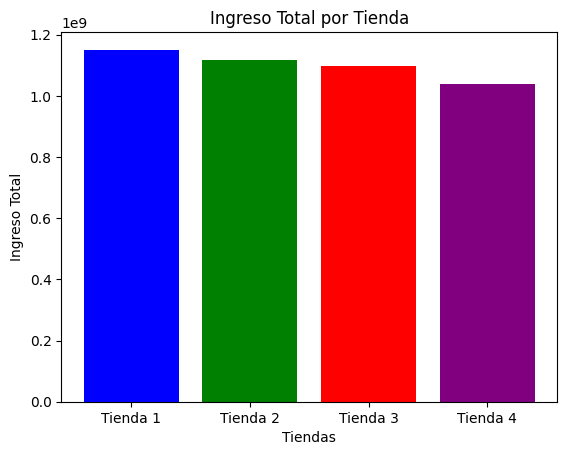

In [ ]:
import matplotlib.pyplot as plt
ingreso_total_tienda_1 = tienda["Precio"].sum()
ingreso_total_tienda_2 = tienda2["Precio"].sum()
ingreso_total_tienda_3 = tienda3["Precio"].sum()
ingreso_total_tienda_4 = tienda4["Precio"].sum()


nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos_totales = [
    ingreso_total_tienda_1,
    ingreso_total_tienda_2,
    ingreso_total_tienda_3,
    ingreso_total_tienda_4,
]

plt.bar(nombres_tiendas, ingresos_totales, color=["blue", "green", "red", "purple"])
plt.title("Ingreso Total por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.show()

2. Ventas por categoría

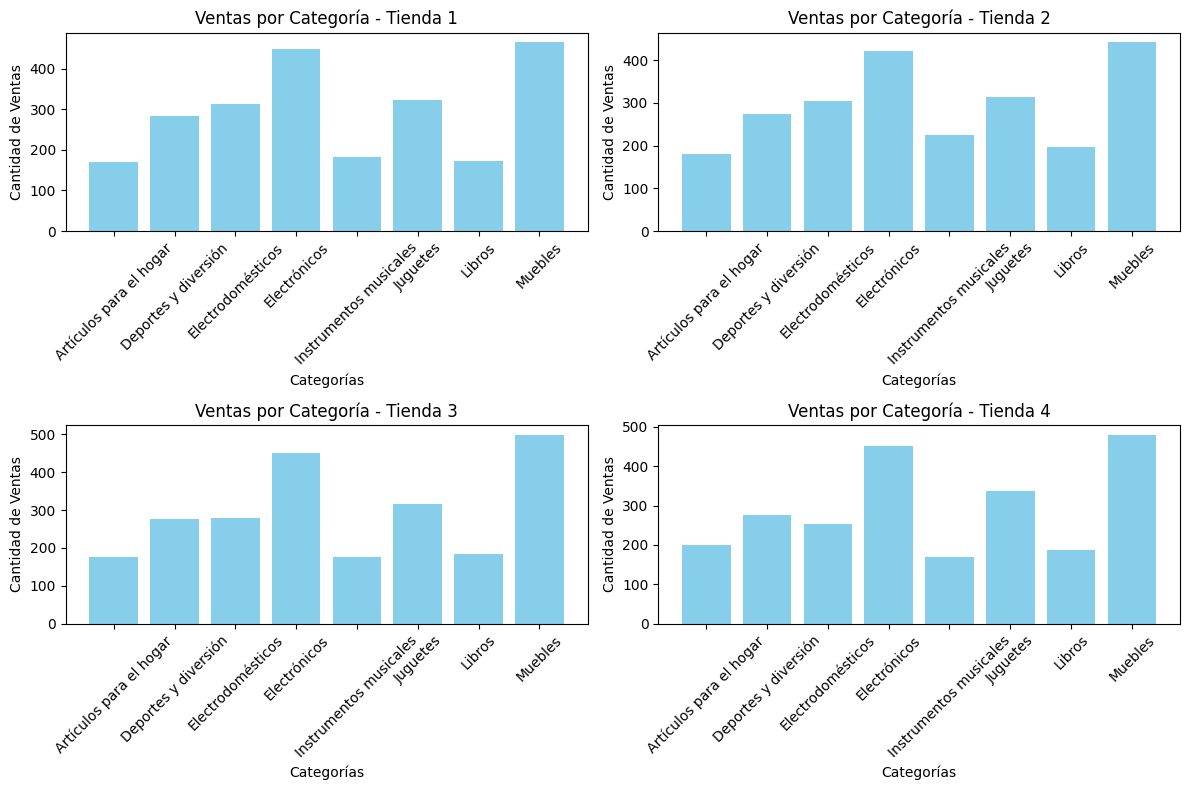

In [ ]:
def ventas_por_categoria(df):
    if "Categoría del Producto" not in df.columns:
        raise ValueError("La columna 'Categoría del Producto' no existe en el DataFrame.")
    return df.groupby("Categoría del Producto").size().reset_index(name="Cantidad_Ventas")

# Calcular las ventas por categoría para cada tienda
try:
    ventas_tienda_1 = ventas_por_categoria(tienda)
    ventas_tienda_2 = ventas_por_categoria(tienda2)
    ventas_tienda_3 = ventas_por_categoria(tienda3)
    ventas_tienda_4 = ventas_por_categoria(tienda4)
except Exception as e:
    print(f"Error al calcular las ventas por categoría: {e}")
    raise

# Crear un gráfico de barras para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas de subgráficos
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Datos de todas las tiendas
datos_tiendas = [
    ("Tienda 1", ventas_tienda_1),
    ("Tienda 2", ventas_tienda_2),
    ("Tienda 3", ventas_tienda_3),
    ("Tienda 4", ventas_tienda_4),
]

# Generar los gráficos
for i, (nombre_tienda, datos) in enumerate(datos_tiendas):
    ax = axes[i]
    ax.bar(datos["Categoría del Producto"], datos["Cantidad_Ventas"], color="skyblue")
    ax.set_title(f"Ventas por Categoría - {nombre_tienda}")
    ax.set_xlabel("Categorías")
    ax.set_ylabel("Cantidad de Ventas")
    ax.tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

plt.tight_layout()  # Ajustar espaciado entre subgráficos
plt.show()

3. Calificación promedio de la tienda

In [ ]:
calificacion_promedio_tienda_1 = tienda["Calificación"].mean()
calificacion_promedio_tienda_2 = tienda2["Calificación"].mean()
calificacion_promedio_tienda_3 = tienda3["Calificación"].mean()
calificacion_promedio_tienda_4 = tienda4["Calificación"].mean()

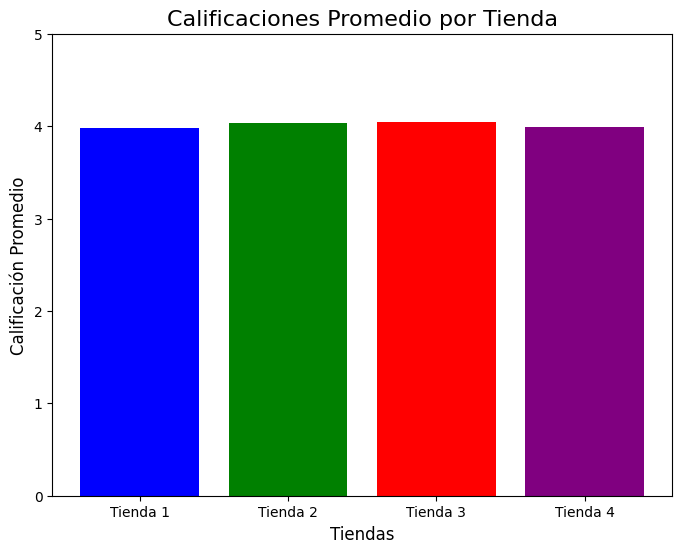

In [ ]:
calificaciones = [
    calificacion_promedio_tienda_1,
    calificacion_promedio_tienda_2,
    calificacion_promedio_tienda_3,
    calificacion_promedio_tienda_4,
]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.bar(nombres_tiendas, calificaciones, color=["blue", "green", "red", "purple"])

# Personalizar el gráfico
plt.title("Calificaciones Promedio por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Calificación Promedio", fontsize=12)
plt.ylim(0, 5)  # Establecer el límite del eje Y entre 0 y 5 (escala de calificaciones)

# Mostrar el gráfico
plt.show()

4. Productos más y menos vendidos

In [ ]:
def obtener_productos_mas_menos_vendidos(df, nombre_tienda):
    # Contar la frecuencia de cada producto
    conteo_productos = df['Producto'].value_counts()

    # Obtener los productos más y menos vendidos
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()

    print(f"Tienda {nombre_tienda}:")
    print(f"Producto más vendido: {mas_vendido} ({conteo_productos[mas_vendido]} unidades)")
    print(f"Producto menos vendido: {menos_vendido} ({conteo_productos[menos_vendido]} unidades)")
    print("\n")

    return conteo_productos

# Aplicar la función a cada tienda
conteo_tienda  = obtener_productos_mas_menos_vendidos(tienda, "1")
conteo_tienda2 = obtener_productos_mas_menos_vendidos(tienda2, "2")
conteo_tienda3 = obtener_productos_mas_menos_vendidos(tienda3, "3")
conteo_tienda4 = obtener_productos_mas_menos_vendidos(tienda4, "4")

Tienda 1:
Producto más vendido: Microondas (60 unidades)
Producto menos vendido: Auriculares con micrófono (33 unidades)


Tienda 2:
Producto más vendido: Iniciando en programación (65 unidades)
Producto menos vendido: Juego de mesa (32 unidades)


Tienda 3:
Producto más vendido: Kit de bancas (57 unidades)
Producto menos vendido: Bloques de construcción (35 unidades)


Tienda 4:
Producto más vendido: Cama box (62 unidades)
Producto menos vendido: Guitarra eléctrica (33 unidades)




In [ ]:
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Lista de tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

def obtener_conteo_productos(df):
    # Contar la frecuencia de cada producto
    conteo_productos = df['Producto'].value_counts().reset_index()
    conteo_productos.columns = ['Producto', 'Cantidad']
    return conteo_productos.sort_values(by='Cantidad', ascending=False)

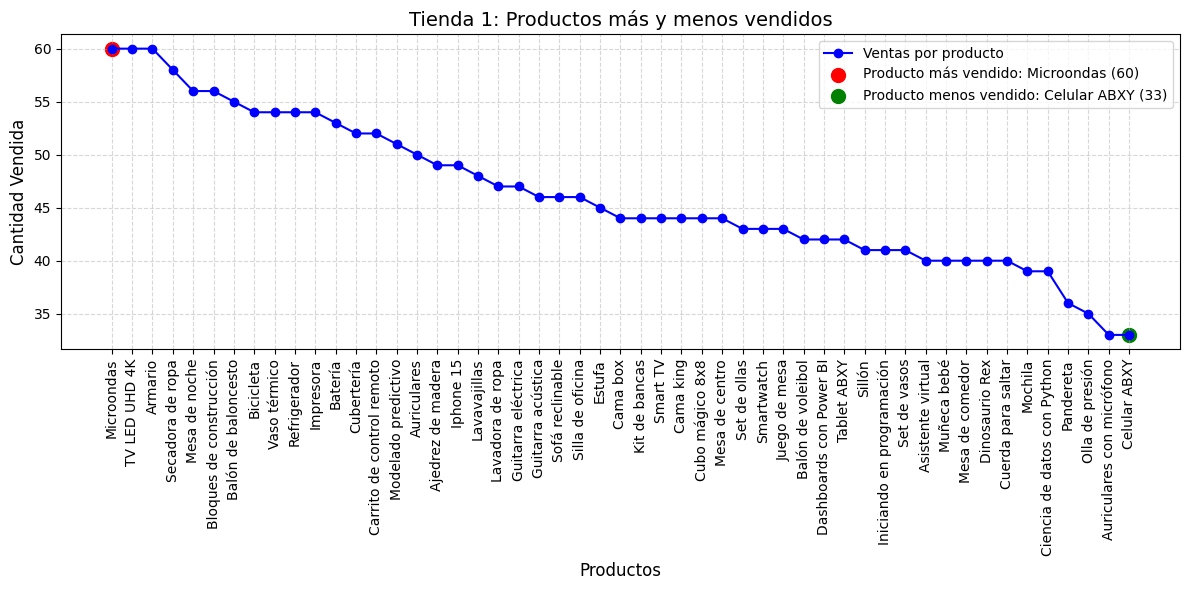

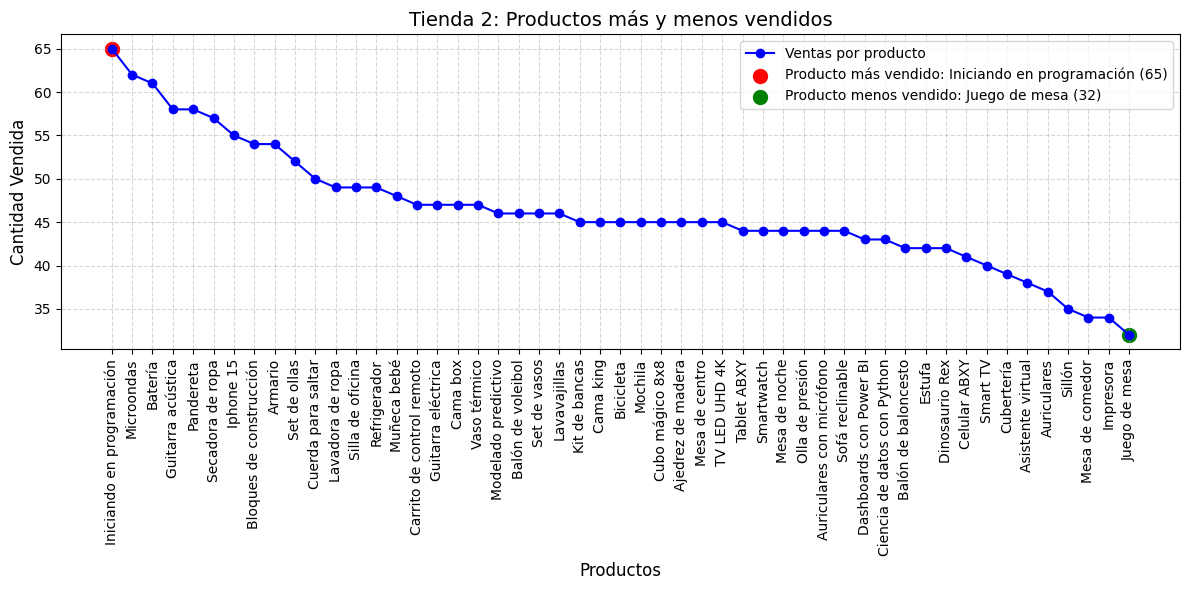

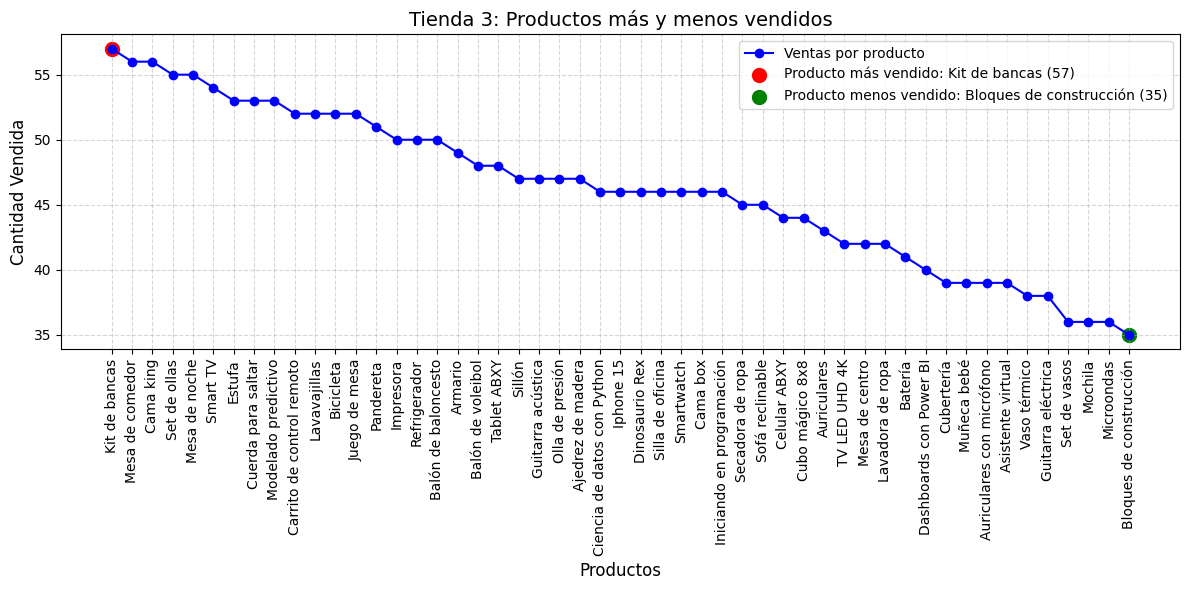

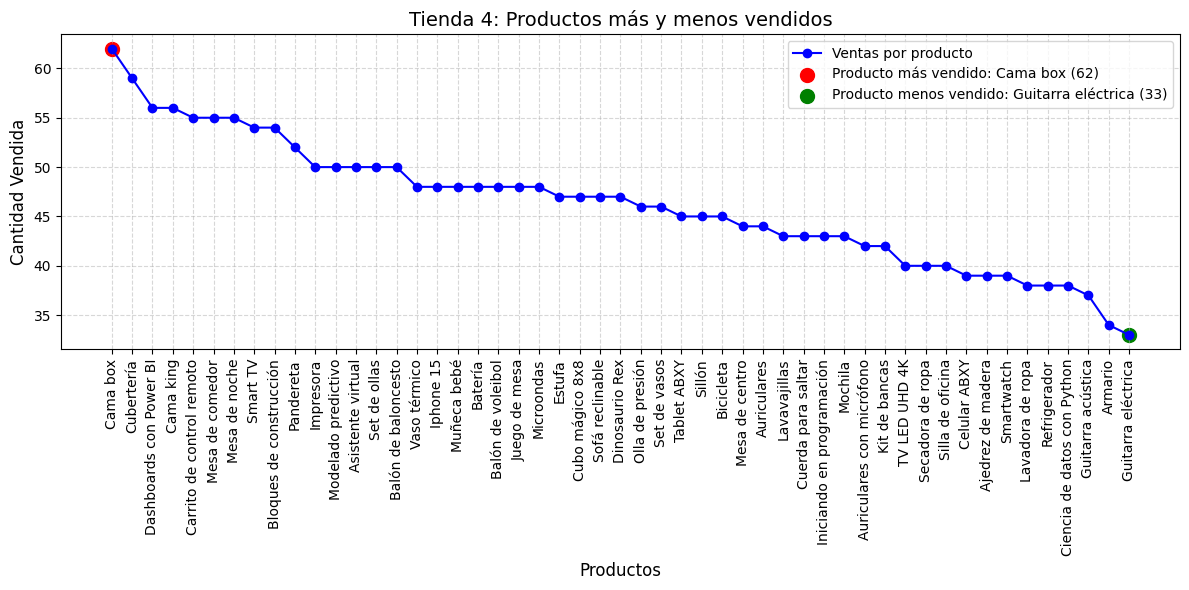

In [ ]:
# Iterar sobre las tiendas
for i, tienda in enumerate(tiendas):
    # Obtener el conteo de productos
    conteo_productos = obtener_conteo_productos(tienda)

    # Crear el gráfico de líneas
    plt.figure(figsize=(12, 6))
    plt.plot(conteo_productos['Producto'], conteo_productos['Cantidad'], marker='o', color='blue', label='Ventas por producto')

    # Resaltar el producto más vendido (punto rojo)
    mas_vendido = conteo_productos.iloc[0]  # Primer producto (más vendido)
    plt.scatter(mas_vendido['Producto'], mas_vendido['Cantidad'], color='red', s=100, label=f"Producto más vendido: {mas_vendido['Producto']} ({mas_vendido['Cantidad']})")

    # Resaltar el producto menos vendido (punto verde)
    menos_vendido = conteo_productos.iloc[-1]  # Último producto (menos vendido)
    plt.scatter(menos_vendido['Producto'], menos_vendido['Cantidad'], color='green', s=100, label=f"Producto menos vendido: {menos_vendido['Producto']} ({menos_vendido['Cantidad']})")

    # Personalizar el gráfico
    plt.title(f"{nombres_tiendas[i]}: Productos más y menos vendidos", fontsize=14)
    plt.xlabel("Productos", fontsize=12)
    plt.ylabel("Cantidad Vendida", fontsize=12)
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula para mayor claridad
    plt.tight_layout()
    plt.show()

5. Envío promedio por tienda


In [ ]:
# Calcular el costo de envío promedio para cada tienda
costos_envio_promedio = []

for i, tienda in enumerate(tiendas):
    costo_promedio = tienda['Costo de envío'].mean()
    costos_envio_promedio.append(costo_promedio)
    print(f"{nombres_tiendas[i]}: Costo de envío promedio = ${costo_promedio:.2f}")

Tienda 1: Costo de envío promedio = $26018.61
Tienda 2: Costo de envío promedio = $25216.24
Tienda 3: Costo de envío promedio = $24805.68
Tienda 4: Costo de envío promedio = $23459.46


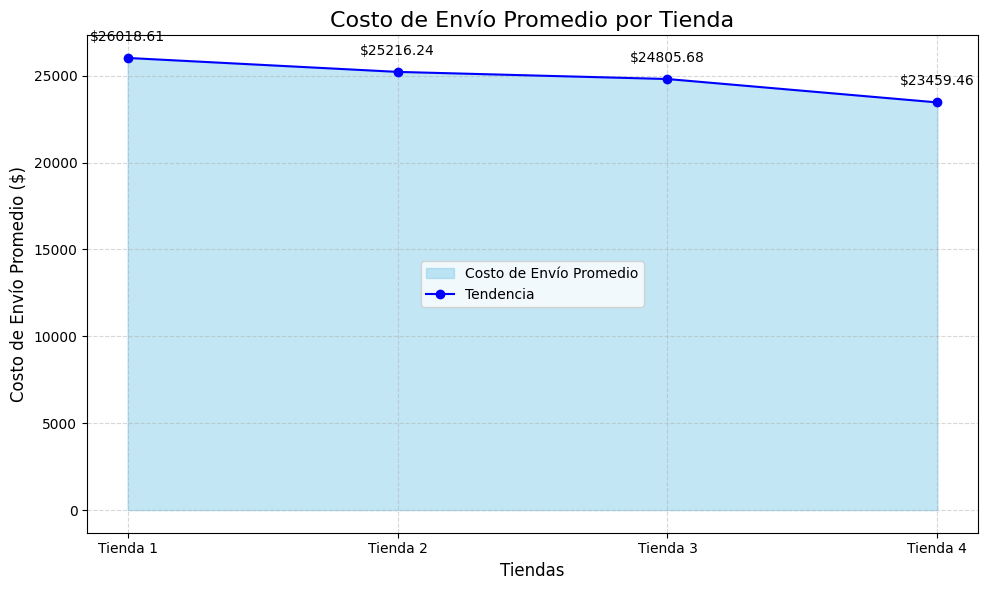

In [ ]:
# Crear el gráfico de área
plt.figure(figsize=(10, 6))

# Gráfico de área
plt.fill_between(nombres_tiendas, costos_envio_promedio, color='skyblue', alpha=0.5, label='Costo de Envío Promedio')

# Línea que conecta los puntos
plt.plot(nombres_tiendas, costos_envio_promedio, marker='o', color='blue', label='Tendencia')

# Resaltar cada punto con su valor
for i, costo in enumerate(costos_envio_promedio):
    plt.text(i, costo + 1000, f"${costo:.2f}", ha='center', fontsize=10, color='black')

# Personalizar el gráfico
plt.title("Costo de Envío Promedio por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Costo de Envío Promedio ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula para mayor claridad
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Informe final

## Introducción
El objetivo de este análisis es evaluar las cuatro tiendas disponibles como (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) con base en diversos factores clave que influyen en su desempeño comercial. Estos factores incluyen los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo promedio de envío. A partir de estos datos, se determinará cuál tienda ofrece las mejores condiciones para ser adquirida por el Sr. Juan, considerando tanto sus fortalezas como sus debilidades.

1. Ingresos Totales: Los ingresos totales de cada tienda se calcularon sumando el precio de venta de todos los productos vendidos. Los resultados fueron los siguientes.


*    La tienda 1 tiene un ingreso total de: 1150880400.0
*    La tienda 2 tiene un ingreso total de: 1116343500.0
*    La tienda 3 tiene un ingreso total de: 1098019600.0
*    La tienda 4 tiene un ingreso total de: 1038375700.0
---

Gráfico : Se utilizó un gráfico de barras para comparar los ingresos totales de las tiendas. La Tienda 1 destacó como la que genera mayores ingresos, mientras que la Tienda 4 mostró los ingresos más bajos.

Interpretación : A una mayor generación de ingresos indica una mayor capacidad de la tienda para atraer clientes y vender productos de alto valor. Esto es un factor crucial a favor de la Tienda 1.


2. Categorías de Productos Más y Menos Vendidas:
Se analizaron las categorías de productos más y menos vendidas en cada tienda. Los resultados muestran.



> Categoría más vendida :
*   Tienda 1: Muebles	(465)
*   Tienda 2: Muebles	(442)
*   Tienda 3: Muebles	(499)
*   Tienda 4: Muebles	(480)


> Categoría menos vendida:
*   Tienda 1: Artículos para el hogar	171
*   Tienda 2: Artículos para el hogar	181
*   Tienda 3: Instrumentos musicales	177
*   Tienda 4: Instrumentos musicales	170

Gráfico : Un gráfico de barras agrupadas mostró la distribución de ventas por categoría. La Tienda 3 destacó al tener una demanda sólida en la categoría de Muebles, que suele ser un segmento rentable debido a su margen de ganancia.

Interpretación : La diversificación de categorías y la presencia de productos de alto margen son ventajas importantes. La Tienda 3 tiene una categoría líder clara (Muebles), lo que sugiere un posicionamiento sólido en el mercado.







3. Calificaciones Promedio de los Clientes
Se calculó el promedio de las calificaciones de los clientes para cada tienda:

* Tienda 1 : 3.977
* Tienda 2 : 4.037
* Tienda 3 : 4.048
* Tienda 4 : 3.996

Gráfico : Un gráfico de barras mostró la tendencia de las calificaciones promedio. La Tienda 3 obtuvo la calificación más alta, lo que refleja una excelente experiencia del cliente.

Interpretación : Las calificaciones altas indican satisfacción del cliente, lo que puede traducirse en lealtad y recomendaciones positivas. La Tienda 3 sobresale en este aspecto.

4. Productos Más y Menos Vendidos
Se identificaron los productos más y menos vendidos en cada tienda:

Producto más vendido :
* Tienda 1: Armario 60
* Tienda 2: Libro "Iniciando en programación"  65
* Tienda 3: Kit de bancas 57
* Tienda 4: Cama box  62

Producto menos vendido :

* Tienda 1: Auriculares con micrófono 33
* Tienda 2: Juego de mesa  43
* Tienda 3: Bloques de construcción  56
* Tienda 4: Guitarra eléctrica  47

Gráfico : Un gráfico de dispersión resaltó los productos más y menos vendidos. La Tienda 2 mostró un producto estrella (Iniciando en programación) con ventas significativamente superiores al resto.

Interpretación : Un producto estrella puede impulsar las ventas generales y atraer a más clientes. La Tienda 2 tiene un producto claro que lidera el mercado.

5. Costo Promedio de Envío
Se calculó el costo promedio de envío para cada tienda:

* El costo promedio de envío de la tienda 1 es: 26018.61
* El costo promedio de envío de la tienda 2 es: 25216.236
* El costo promedio de envío de la tienda 3 es: 24805.68
* El costo promedio de envío de la tienda 4 es: 23459.457

Gráfico : Un gráfico de área mostró la evolución del costo promedio de envío. La Tienda 1 tiene el costo más alto, pero esto puede estar justificado por la naturaleza de sus productos (muebles grandes y pesados).

Interpretación : Aunque el costo de envío es más alto, la rentabilidad de ingreso total de los productos vendidos en la Tienda 1 compensa este gasto.

# Conclusión

Durante este análisis, hemos evaluado los datos de las cuatro tiendas de Alura Store (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) en función de varios factores clave: ingresos totales , categorías de productos más y menos vendidas , calificaciones promedio de los clientes , productos más y menos vendidos y costo promedio de envío . El objetivo era identificar la tienda menos eficiente para que el Sr. Juan pueda venderla y destinar sus recursos a un nuevo emprendimiento.

Tras analizar estos factores, llegamos a la siguiente recomendación :
El Sr. Juan debería vender la Tienda 4.

# Recomendación
La Tienda 4 es la opción más adecuada para ser vendida debido a su bajo rendimiento en comparación con las demás tiendas. Sus ingresos son los más bajos, carece de un producto estrella claro y no destaca en satisfacción del cliente ni en categorías de productos rentables.
Al vender la Tienda 4, el Sr. Juan podrá enfocarse en las otras tiendas, que tienen mejores ingresos, productos más competitivos y una mayor satisfacción del cliente. Este enfoque estratégico permitirá maximizar el éxito de su nuevo emprendimiento y garantizar un uso más eficiente de sus recurso

# Extra

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [3]:
# Cargar los datos en DataFrames
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Lista de tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

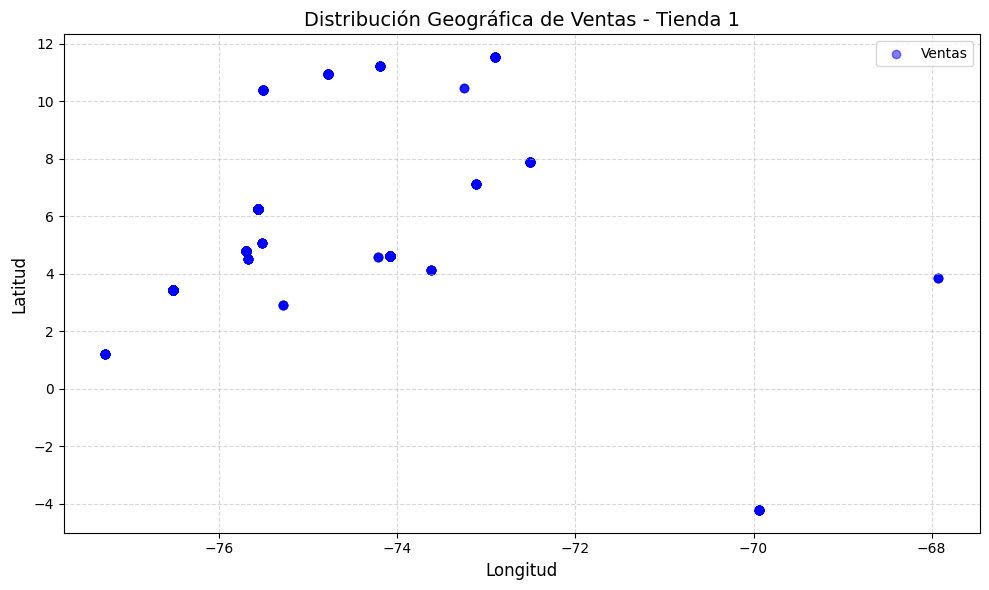

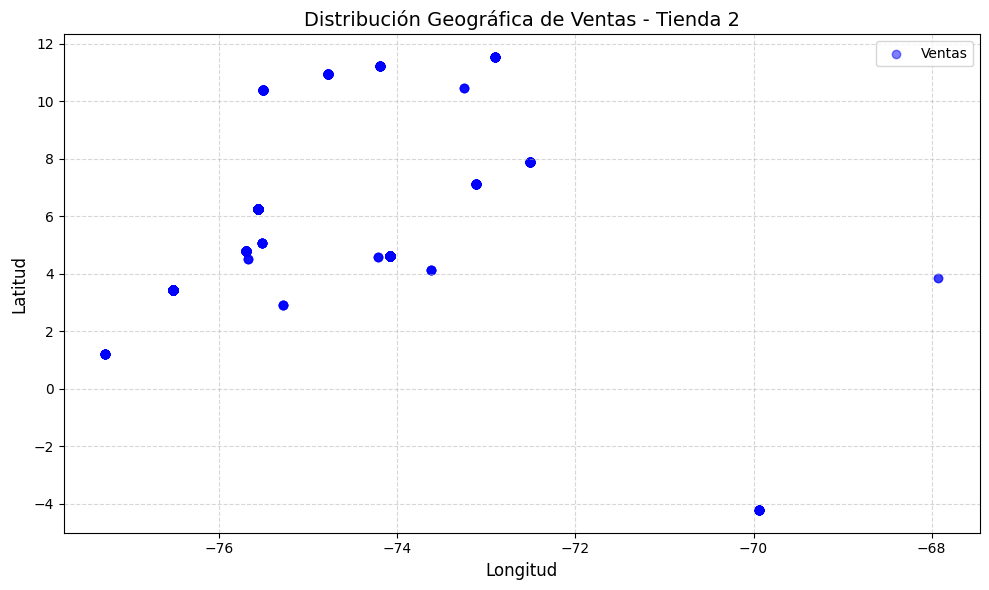

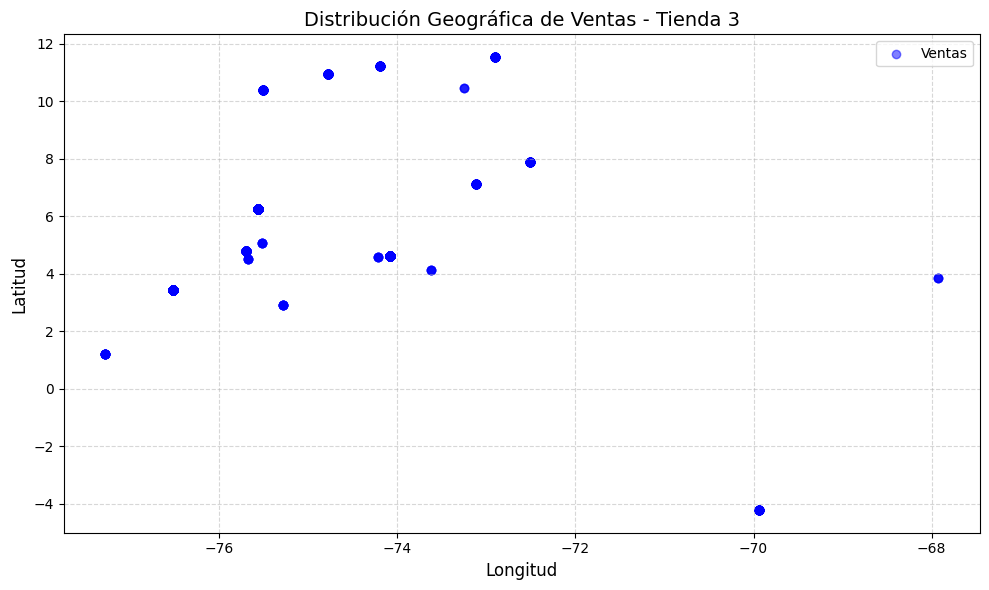

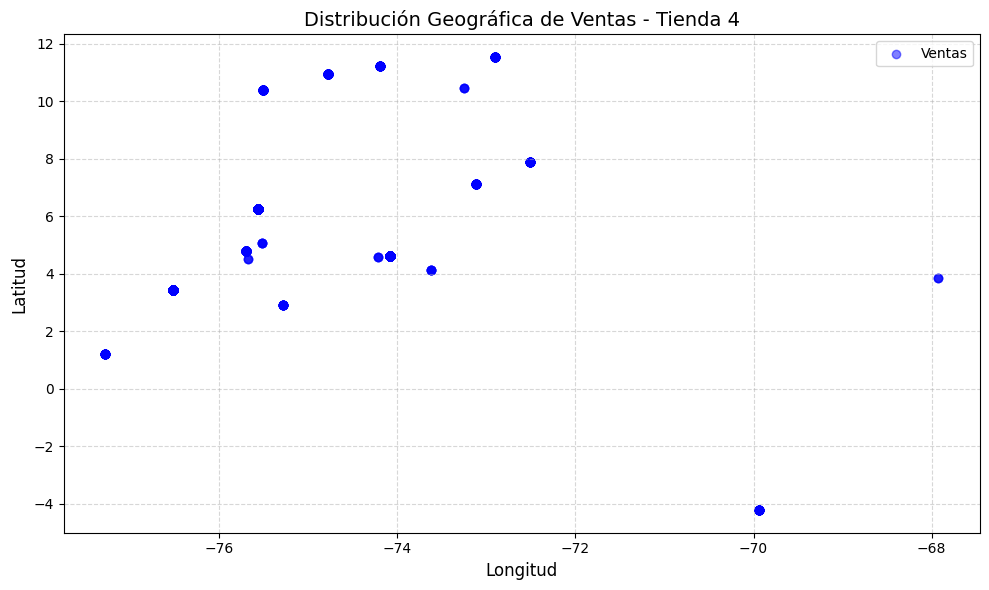

In [4]:
# Iterar sobre las tiendas
for i, tienda in enumerate(tiendas):
    plt.figure(figsize=(10, 6))
    plt.scatter(tienda['lon'], tienda['lat'], alpha=0.5, color='blue', label='Ventas')

    # Personalizar el gráfico
    plt.title(f"Distribución Geográfica de Ventas - {nombres_tiendas[i]}", fontsize=14)
    plt.xlabel("Longitud", fontsize=12)
    plt.ylabel("Latitud", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
# Función para analizar el rendimiento por región
def analizar_rendimiento_por_region(df, nombre_tienda):
    # Agrupar por latitud y longitud para calcular ingresos y calificación promedio
    region_stats = df.groupby(['lat', 'lon']).agg({
        'Precio': 'sum',
        'Calificación': 'mean'
    }).reset_index()

    # Mostrar las regiones con mayores ingresos
    top_regiones = region_stats.nlargest(5, 'Precio')
    print(f"\nRegiones con mayores ingresos en {nombre_tienda}:")
    print(top_regiones)

    # Mostrar las regiones con mejores calificaciones
    mejores_calificaciones = region_stats.nlargest(5, 'Calificación')
    print(f"\nRegiones con mejores calificaciones en {nombre_tienda}:")
    print(mejores_calificaciones)

# Aplicar la función a cada tienda
for i, tienda in enumerate(tiendas):
    analizar_rendimiento_por_region(tienda, nombres_tiendas[i])


Regiones con mayores ingresos en Tienda 1:
        lat       lon       Precio  Calificación
8   4.60971 -74.08175  440005000.0      4.089431
11  6.25184 -75.56359  296858100.0      3.866785
3   3.43722 -76.52250  154493700.0      3.985866
9   4.81333 -75.69611   56214300.0      3.947368
13  7.89391 -72.50782   37879500.0      3.882353

Regiones con mejores calificaciones en Tienda 1:
        lat       lon      Precio  Calificación
7   4.57937 -74.21682   4126000.0      4.600000
2   2.92730 -75.28189   3494000.0      4.500000
12  7.12539 -73.11980  17579200.0      4.387097
0  -4.21528 -69.94056  14669800.0      4.156250
5   4.14200 -73.62664   7161900.0      4.090909

Regiones con mayores ingresos en Tienda 2:
        lat       lon       Precio  Calificación
8   4.60971 -74.08175  479959200.0      4.136041
11  6.25184 -75.56359  297246700.0      3.919192
3   3.43722 -76.52250  118257600.0      4.252252
9   4.81333 -75.69611   43073800.0      3.953125
13  7.89391 -72.50782   28991500.0 

In [11]:

for i, tienda in enumerate(tiendas):
    # Filtrar las columnas relevantes (lat, lon)
    coordenadas = tienda[['lat', 'lon']].values.tolist()

    # Crear un mapa centrado en Colombia
    mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

    # Agregar el heatmap al mapa
    HeatMap(coordenadas).add_to(mapa)

    # Mostrar el mapa directamente en el cuaderno
    print(f"Mapa de calor para {nombres_tiendas[i]}")
    display(mapa)

Mapa de calor para Tienda 1


Mapa de calor para Tienda 2


Mapa de calor para Tienda 3


Mapa de calor para Tienda 4
